In [1]:
%load_ext autoreload
%autoreload 2

# Sentinel 1 Flood Finder 

The `flood_finder` package can be easily used to discover Sentinel 1 imagery, by using the `ImageFinder` class. This notebook shows how to use it.


## Define an AOI

To define an Area of Interest (AOI), we can make use of the `geojson.io` interactive map that outputs the `GeoJson` representation of a polygon. In the following example, I've created a Polygon (box) around the lake Cassó in Maranhão state (Brazil). This AOI is geojson converted to a shapely geometry using `shape` function.

In [2]:
from shapely.geometry import shape

casso = {
    "coordinates": [
        [
        [
            -43.29677596638584,
            -2.936207963177125
        ],
        [
            -43.29677596638584,
            -2.990616590511422
        ],
        [
            -43.21694693606378,
            -2.990616590511422
        ],
        [
            -43.21694693606378,
            -2.936207963177125
        ],
        [
            -43.29677596638584,
            -2.936207963177125
        ]
        ]
    ],
    "type": "Polygon"
}


aoi = shape(casso)

## The `ImageFinder` class

The `ImageFinder` class is responsible for querying and fetching Sentinel 1 imagery data from the <b>MS Planetary Computer</b>. 

<b>Note:</b> Since the shutdown of the Planetary Computer HUB, from 06/05/2024, the subscription key is no more needed to download S1-RTC datasets. 

In [11]:
from flood_finder.imagery import ImageFinder

s1finder = ImageFinder()
imgs = s1finder.get_s1_images(
    aoi=aoi,
    time_range='2023-11-01/2023-12-31',
    
)

imgs

S1Imagery Class with 7 dates

In [12]:
imgs.dates

array(['2023-11-08', '2023-11-11', '2023-12-02', '2023-12-05',
       '2023-12-14', '2023-12-17', '2023-12-29'], dtype=object)

The specific images can be accessed directly by specifying the date and it will return a `xr.DataArray` already with the LeeFilter applied to smooth speckle.

In [14]:
s1img = imgs['2023-12-02']
s1img

<xarray.DataArray 'stackstac-3bc699d4b61ccaf6ccd711483fa527af' (band: 2,
                                                                y: 602, x: 889)>
array([[[0.05994239, 0.06238123, 0.06846475, ..., 0.04870705,
         0.05568511, 0.05406071],
        [0.0593565 , 0.06071009, 0.06342354, ..., 0.04939923,
         0.05475117, 0.05529717],
        [0.0568675 , 0.05665653, 0.05741996, ..., 0.05144103,
         0.05614069, 0.05818775],
        ...,
        [0.03963542, 0.03784766, 0.03497683, ..., 0.01947621,
         0.02092469, 0.02124809],
        [0.04086249, 0.03914855, 0.03644458, ..., 0.0202009 ,
         0.02176932, 0.02217174],
        [0.03998683, 0.03862456, 0.03634902, ..., 0.02128118,
         0.02326865, 0.0238585 ]],

       [[0.16133675, 0.19900483, 0.25431252, ..., 0.23805901,
         0.22426039, 0.19074668],
        [0.12905446, 0.16110034, 0.22888684, ..., 0.2902013 ,
         0.24173756, 0.18857381],
        [0.12805144, 0.14043072, 0.21333635, ..., 0.26328596,
         0.20892787, 0.1770252 ],
        ...,
        [0.16790564, 0.1919161 , 0.19676521, ..., 0.07315481,
         0.0697649 , 0.07461717],
        [0.18439025, 0.19902368, 0.2176343 , ..., 0.08846992,
         0.09052286, 0.09471987],
        [0.1875348 , 0.19438916, 0.21569042, ..., 0.08503307,
         0.09974591, 0.10984207]]], dtype=float32)
Coordinates: (12/40)
  * x                                      (x) float64 -43.3 -43.3 ... -43.22
  * y                                      (y) float64 -2.936 -2.936 ... -2.991
    end_datetime                           <U32 '2023-12-02 08:34:10.499124+0...
    platform                               <U11 'SENTINEL-1A'
  * band                                   (band) <U2 'vh' 'vv'
    raster:bands                           object {'nodata': -32768, 'data_ty...
    ...                                     ...
    sat:relative_orbit                     int64 126
    sat:absolute_orbit                     int64 51473
    sat:platform_international_designator  <U9 '2014-016A'
    s1:product_timeliness                  <U8 'Fast-24h'
    s1:shape                               object {24841, 29190}
    spatial_ref                            int64 0
Attributes:
    _FillValue:  3.402823466e+38

## Plotting Dates

To quickly plot the images, it is possible to call the `plot_date` and optionally pass the Axes, like so: 

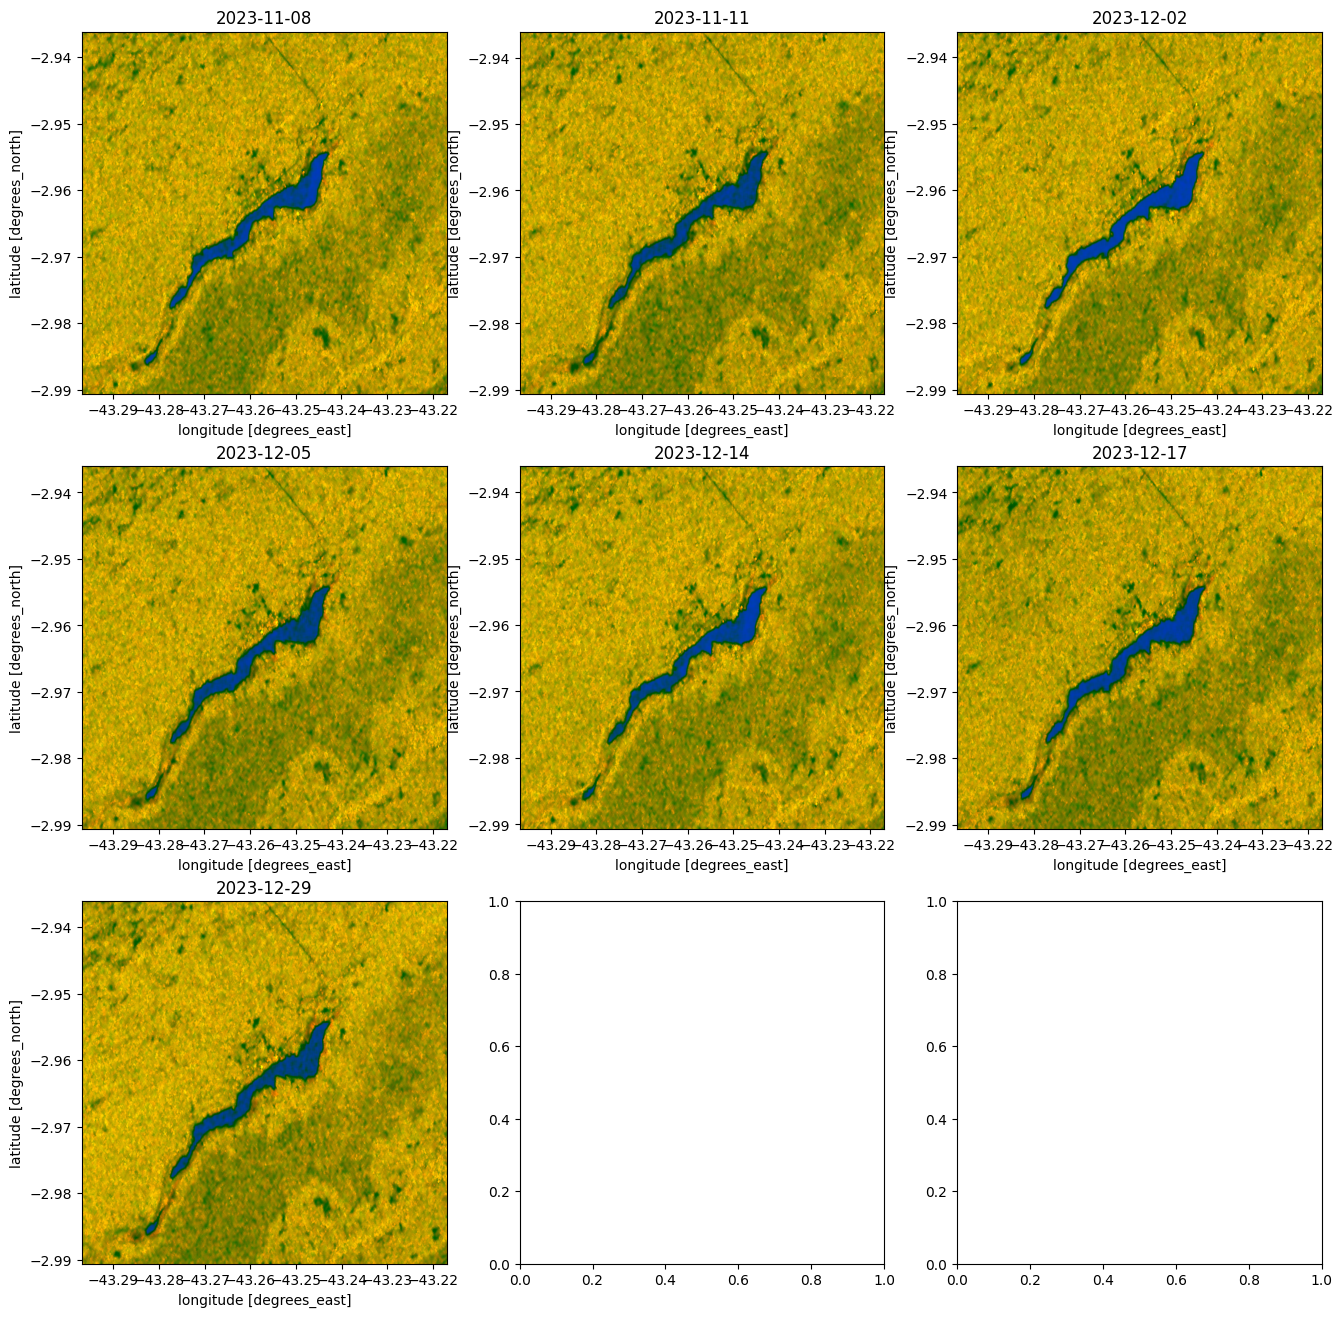

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(16, 16))


for ax, date in zip(axs.flatten(), imgs.dates):
    imgs.plot_date(date, ax=ax)

In [10]:
imgs[imgs.dates[0]]

<xarray.DataArray 'stackstac-5fab1aa25880d3b8ef13c237f7072950' (band: 2,
                                                                y: 602, x: 889)>
array([[[0.0718425 , 0.07014882, 0.06623874, ..., 0.05784484,
         0.06457815, 0.06661035],
        [0.06926763, 0.06774139, 0.06408553, ..., 0.05746363,
         0.06358911, 0.06428416],
        [0.06432972, 0.06222165, 0.05989595, ..., 0.06005814,
         0.06563015, 0.06545588],
        ...,
        [0.03142056, 0.0312607 , 0.02946058, ..., 0.0185965 ,
         0.01822593, 0.0186167 ],
        [0.03298785, 0.03250756, 0.03041083, ..., 0.01785343,
         0.01793162, 0.01845909],
        [0.03281116, 0.03202619, 0.02999526, ..., 0.01717899,
         0.01775977, 0.01852433]],

       [[0.16141479, 0.1717867 , 0.1837233 , ..., 0.19126266,
         0.2073742 , 0.20667425],
        [0.14832675, 0.18732686, 0.21040326, ..., 0.18700232,
         0.20111665, 0.20317113],
        [0.14170963, 0.18230695, 0.21050987, ..., 0.19597363,
         0.19304293, 0.20584334],
        ...,
        [0.1360406 , 0.13806129, 0.11929631, ..., 0.10880475,
         0.1261773 , 0.11714486],
        [0.13451968, 0.13621713, 0.12510845, ..., 0.11107783,
         0.14055717, 0.14179713],
        [0.13471521, 0.1309347 , 0.12261679, ..., 0.10330245,
         0.14064161, 0.15464613]]], dtype=float32)
Coordinates: (12/40)
  * x                                      (x) float64 -43.3 -43.3 ... -43.22
  * y                                      (y) float64 -2.936 -2.936 ... -2.991
    end_datetime                           <U32 '2023-11-08 08:34:10.821235+0...
    platform                               <U11 'SENTINEL-1A'
  * band                                   (band) <U2 'vh' 'vv'
    raster:bands                           object {'nodata': -32768, 'data_ty...
    ...                                     ...
    sat:relative_orbit                     int64 126
    sat:absolute_orbit                     int64 51123
    sat:platform_international_designator  <U9 '2014-016A'
    s1:product_timeliness                  <U8 'Fast-24h'
    s1:shape                               object {29192, 24854}
    spatial_ref                            int64 0
Attributes:
    _FillValue:  3.402823466e+38

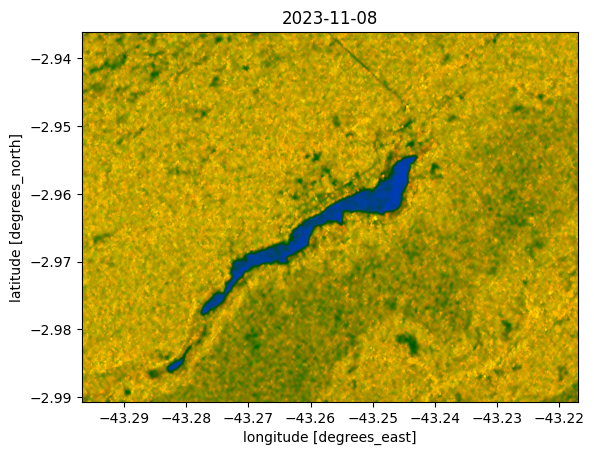

In [11]:
imgs.plot_date(imgs.dates[0])

In [12]:
imgs.dates

array(['2023-11-08', '2023-11-11'], dtype=object)

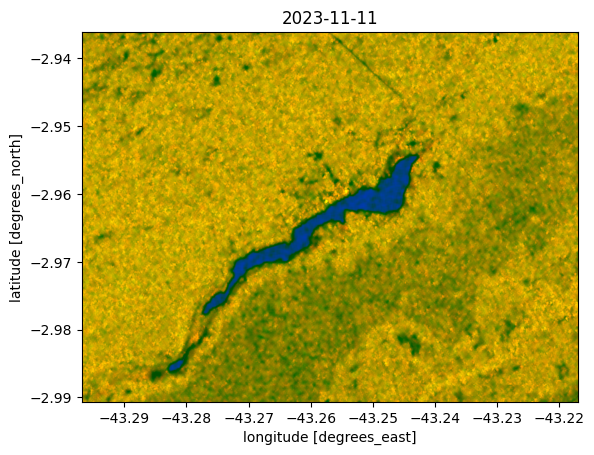

In [14]:
imgs.plot_date('2023-11-11')